<a href="https://colab.research.google.com/github/hajir09/python-face-recognition/blob/master/python_face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Penginstallan Library

In [ ]:
!pip install cmake # sudah ada jika di google colab

In [ ]:
!pip install dlib # sudah ada jika di google colab

In [ ]:
!pip install opencv-python # sudah ada jika di google colab

In [ ]:
!pip install face_recognition==1.2.3

# Eksekusi Basic Code

[False] [0.79550422]


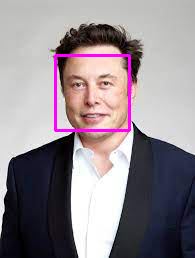

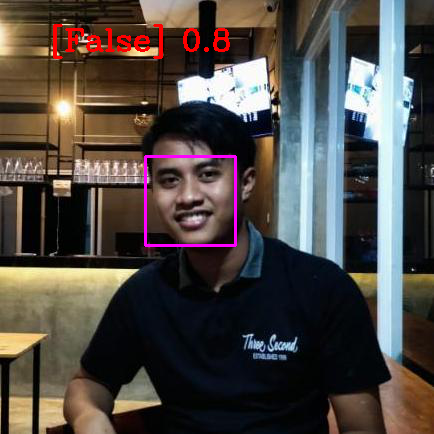

In [ ]:
import cv2
import face_recognition
from google.colab.patches import cv2_imshow

path = '/content/drive/MyDrive/Dataset Project/python-face-recognition/ImagesBasic';
imgElon = face_recognition.load_image_file(path + '/Elon Musk.jpg')
imgElon = cv2.cvtColor(imgElon,cv2.COLOR_BGR2RGB)
imgTest = face_recognition.load_image_file(path + '/Nadhif Muhajir.jpg')
imgTest = cv2.cvtColor(imgTest,cv2.COLOR_BGR2RGB)

faceLoc = face_recognition.face_locations(imgElon)[0]
encodeElon = face_recognition.face_encodings(imgElon)[0]
cv2.rectangle(imgElon,(faceLoc[3],faceLoc[0]),(faceLoc[1],faceLoc[2]),(255,0,255),2)

faceLocTest = face_recognition.face_locations(imgTest)[0]
encodeTest = face_recognition.face_encodings(imgTest)[0]
cv2.rectangle(imgTest,(faceLocTest[3],faceLocTest[0]),(faceLocTest[1],faceLocTest[2]),(255,0,255),2)

results = face_recognition.compare_faces([encodeElon],encodeTest)
faceDis = face_recognition.face_distance([encodeElon],encodeTest)
print(results,faceDis)
cv2.putText(imgTest,f'{results} {round(faceDis[0],2)}',(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)

cv2_imshow(imgElon)
cv2_imshow(imgTest)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Eksekusi Mode Attendance Project

**Tambahan Penginstallan Library OPENCV HEADLESS**




In [ ]:
!pip install opencv-python-headless

In [ ]:
import cv2
import numpy as np
import face_recognition
import os
import sys
from datetime import datetime

path = '/content/drive/MyDrive/Dataset Project/python-face-recognition/ImagesAttendance'
images = []
classNames = []
myList = os.listdir(path)

print(myList)

for cl in myList:
  curImg = cv2.imread(f'{path}/{cl}')
  images.append(curImg)
  classNames.append(os.path.splitext(cl)[0])

# test
 
print(classNames)
# sys.exit()
 
def findEncodings(images):
    encodeList = []
    for img in images:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        encode = face_recognition.face_encodings(img)[0]
        encodeList.append(encode)
    return encodeList
 
def markAttendance(name):
    with open('Attendance.csv','r+') as f:
        myDataList = f.readlines()
        nameList = []
        for line in myDataList:
            entry = line.split(',')
            nameList.append(entry[0])
        if name not in nameList:
            now = datetime.now()
            dtString = now.strftime('%H:%M:%S')
            f.writelines(f'\n{name},{dtString}')
 
encodeListKnown = findEncodings(images)
print('Encoding Complete')
 
cap = cv2.VideoCapture(0)
 
while True:
    success, img = cap.read()
    if not success:
        continue # lanjut ke frame selanjutnya jika frame tidak berhasil dibaca

    imgS = cv2.resize(img, (0,0), None, 0.25, 0.25)
    imgS = cv2.cvtColor(imgS, cv2.COLOR_BGR2RGB)
 
    facesCurFrame = face_recognition.face_locations(imgS)
    encodesCurFrame = face_recognition.face_encodings(imgS, facesCurFrame)
 
    for encodeFace, faceLoc in zip(encodesCurFrame, facesCurFrame):
        matches = face_recognition.compare_faces(encodeListKnown, encodeFace)
        faceDis = face_recognition.face_distance(encodeListKnown, encodeFace)
        # print(faceDis)
        matchIndex = np.argmin(faceDis)
 
        if matches[matchIndex]:
            name = classNames[matchIndex].upper()
            # print(name)
            y1,x2,y2,x1 = faceLoc
            y1, x2, y2, x1 = y1*4,x2*4,y2*4,x1*4
            cv2.rectangle(img, (x1,y1), (x2,y2), (0,255,0), 2)
            cv2.rectangle(img, (x1,y2-35), (x2,y2), (0,255,0), cv2.FILLED)
            cv2.putText(img, name, (x1+6,y2-6), cv2.FONT_HERSHEY_COMPLEX, 1, (255,255,255), 2)
            markAttendance(name)
 
    cv2.imshow('Webcam', img)
    if cv2.waitKey(1) == ord('q'):
        break

 
cap.release()
cv2.destroyAllWindows()


['Bill gates.jpg', 'Elon Musk.jpg', 'Nadhif Muhajir.jpg']
['Bill gates', 'Elon Musk', 'Nadhif Muhajir']
Encoding Complete


# Coba Kamera CV2

In [18]:
import cv2
from google.colab.patches import cv2_imshow

# Mendefinisikan nomor kamera yang digunakan (biasanya 0 untuk kamera internal)
camera_port = 0

# Membuka kamera
camera = cv2.VideoCapture(camera_port)

# Loop untuk membaca frame
while True:
    # Membaca frame dari kamera
    ret, frame = camera.read()
    
    # Jika tidak dapat membaca frame, keluar dari loop
    if not ret:
      print ("Gagal membuka kamera")
      break
    
    # Menampilkan frame
    cv2_imshow(frame)
    
    # Keluar dari loop jika tombol 'q' ditekan
    if cv2.waitKey(1) == ord('q'):
        break

# Melepaskan kamera
camera.release()

# Menghancurkan semua jendela
cv2.destroyAllWindows()


Gagal membuka kamera


# Coba Kamera ImageIO

In [ ]:
import imageio
from google.colab import output
from PIL import Image

# Mengambil video dari kamera
reader = imageio.get_reader('<video0>')

for i, frame in enumerate(reader):
    # Menampilkan frame
    img = Image.fromarray(frame)
    output.clear()
    display(img)
    
    # Keluar dari loop jika tombol 'q' ditekan
    if i > 50 or not output.is_in_cell_display():
        break
        
# Melepaskan kamera
reader.close()


IndexError: ignored